## 1 - Importation des librairies Python nécessaires à la résolution du problème

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# To train a logistic regression model ロジスティック回帰モデルの学習
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [4]:
from sklearn.metrics import accuracy_score

## 2 - Chargement des données du Breast Cancer Wisconsin (diagnostic) Dataset

In [5]:
# read breast_cancer
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer(as_frame=True)

In [6]:
pd.DataFrame(data = cancer.data).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#sns.pairplot(cancer)

## 3 - 1  Afficher la description des données en utilisant l'attribut DESCR

In [8]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [9]:
cancer

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

In [10]:
# check breast_cancer data(dict-keys) : Use keys() function to find the index of the pandas series object.
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
cancer.feature_names # 30 variables explicatives 説明変数 30種類

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
len(cancer.data) # verify number of data データ数 569件

569

## 3 - 2 afficher le dataFrame cancer

In [13]:
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df.describe() #description of dataset 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
df.shape #569 rows and 30 columns

(569, 30)

In [17]:
df.columns     #displaying the columns of dataset

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [18]:
df.value_counts

<bound method DataFrame.value_counts of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  

In [19]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [20]:
cancer.target[:50] # valeur de sortie 目的変数（先頭50件） 診断2値データ

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
20    1
21    1
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    1
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    1
47    0
48    1
49    1
Name: target, dtype: int32

In [21]:
cancer.target_names # valeur de sortie 目的変数 Y 診断2値の内容
# 0 : malignant(悪性)
# 1 : benign(良性)

array(['malignant', 'benign'], dtype='<U9')

In [22]:
df.isnull().sum() # on verify that the data set doen't contain null => good data

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

### VISUALIZING THE DATA

In [23]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot:>

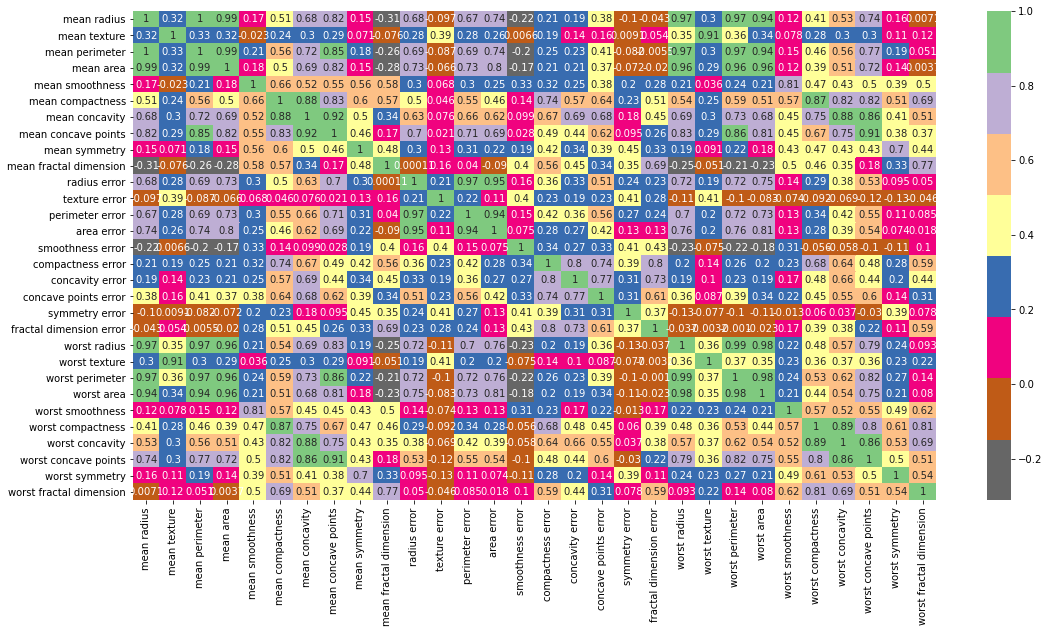

In [24]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),annot = True, cmap ="Accent_r")

In [25]:
# 診断の内訳
malignant_count = len(np.where(cancer.target==0)[0])
benign_count = len(np.where(cancer.target==1)[0])
print('0:malignité', malignant_count)
print('1:bénin', benign_count)

0:malignité 212
1:bénin 357


In [26]:
# 
np.where(cancer.target==1)[0]

array([ 19,  20,  21,  37,  46,  48,  49,  50,  51,  52,  55,  58,  59,
        60,  61,  63,  66,  67,  68,  69,  71,  74,  76,  79,  80,  81,
        84,  88,  89,  90,  92,  93,  96,  97,  98, 101, 102, 103, 104,
       106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 120, 123, 124,
       125, 128, 130, 133, 136, 137, 139, 140, 142, 143, 144, 145, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 159, 160, 163,
       165, 166, 169, 170, 173, 174, 175, 176, 178, 179, 183, 185, 187,
       188, 189, 191, 192, 195, 200, 204, 206, 208, 209, 211, 216, 217,
       220, 221, 222, 224, 225, 226, 227, 228, 231, 232, 234, 235, 238,
       240, 241, 242, 243, 245, 246, 247, 248, 249, 251, 266, 267, 268,
       269, 270, 271, 273, 275, 276, 278, 279, 281, 284, 285, 286, 287,
       288, 289, 290, 291, 292, 293, 294, 295, 296, 298, 299, 301, 303,
       304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316,
       318, 319, 320, 322, 324, 325, 326, 327, 331, 332, 333, 33

In [27]:
np.where(cancer.target==0)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  38,  39,  40,  41,  42,
         43,  44,  45,  47,  53,  54,  56,  57,  62,  64,  65,  70,  72,
         73,  75,  77,  78,  82,  83,  85,  86,  87,  91,  94,  95,  99,
        100, 105, 108, 117, 118, 119, 121, 122, 126, 127, 129, 131, 132,
        134, 135, 138, 141, 146, 156, 161, 162, 164, 167, 168, 171, 172,
        177, 180, 181, 182, 184, 186, 190, 193, 194, 196, 197, 198, 199,
        201, 202, 203, 205, 207, 210, 212, 213, 214, 215, 218, 219, 223,
        229, 230, 233, 236, 237, 239, 244, 250, 252, 253, 254, 255, 256,
        257, 258, 259, 260, 261, 262, 263, 264, 265, 272, 274, 277, 280,
        282, 283, 297, 300, 302, 317, 321, 323, 328, 329, 330, 335, 337,
        339, 343, 351, 352, 353, 365, 366, 368, 369, 370, 372, 373, 379,
        385, 389, 392, 393, 400, 408, 414, 417, 430

## 4 - Créer un tableau Numpy noté X contenant les (569, 30) données d'entrées

In [28]:
# df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
# X = cancer.data.to_numpy() -- 1

# X = df.to_numpy() -- 2
# 1 et 2 sont pareil

In [29]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [30]:
X = df.to_numpy()
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [31]:
print(type(X))

<class 'numpy.ndarray'>


## 5 - Créer un tableau Numpy noté y contenant les (506,) données de sortie

In [32]:
df_cp = df.copy()

make a copy of cancer to change target

In [33]:
cancer_mod = cancer.frame.copy()

In [34]:
cancer_mod.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [35]:
df_cp['diagnosis'] = cancer.target
df_cp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [36]:
y = df_cp['diagnosis'].to_numpy()
y.shape
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [37]:
y = df_cp.iloc[:,-1].to_numpy()
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [38]:
df_cp.shape

(569, 31)

## make a copy of dataFrame before changing 0 and 1

### relabelliser les patients sains par la valeur 0 et les patients malades par la valeur 1

In [39]:
df_cp['diagnosis_mod'] = np.where(df_cp['diagnosis'] == 1, 0, 1) # np.where(condition, value if true, value if false)

In [40]:
cancer.target = df_cp['diagnosis_mod']
cancer.target.value_counts()

0    357
1    212
Name: diagnosis_mod, dtype: int64

In [41]:
df_cp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis,diagnosis_mod
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


In [42]:
y = df_cp.iloc[:,-1].to_numpy()
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

## 5 - Split Cancer data into training data and test data (20%)

In [43]:
# Cancerデータを訓練データとテストデータ(test_size=113)に分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=113, random_state=42, stratify=y)

In [44]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (456, 30)
X_test (113, 30)
y_train (456,)
y_test (113,)


## 6 - Afficher sous forme d'histogrammes la distribution du jeu de données initial, du jeu de train et du jeu de test en fonction de chaque catégorie (bénigne et maline)

In [45]:
print(y_test)

169    0
250    1
381    0
534    0
362    0
      ..
528    0
383    0
418    0
86     1
14     1
Name: diagnosis_mod, Length: 113, dtype: int32


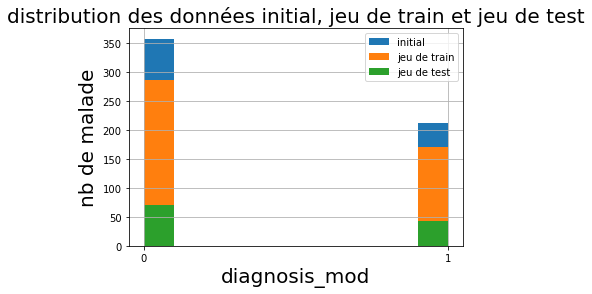

In [46]:
#plt.figure(1, figsize=(7, 5), dpi=100)
plt.title("distribution des données initial, jeu de train et jeu de test", fontsize=20)  
plt.xlabel("diagnosis_mod", fontsize=20)            
plt.ylabel("nb de malade", fontsize=20) 
plt.grid()

plt.xticks([0, 1])
plt.hist(y, bins=10, label="initial")
plt.hist(y_train, bins=10, label="jeu de train")
plt.hist(y_test, bins=10, label="jeu de test")
plt.legend()
plt.show()

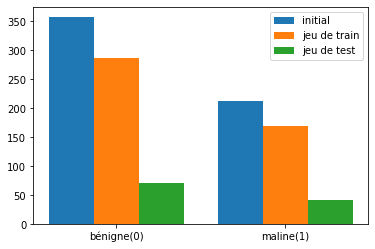

In [47]:
plt.hist([y, y_train, y_test], label=['initial', 'jeu de train', 'jeu de test'], bins=np.arange(3) - 0.5)
plt.legend(loc='upper right')
plt.xticks([0, 1], ["bénigne(0)", "maline(1)"])
plt.show()

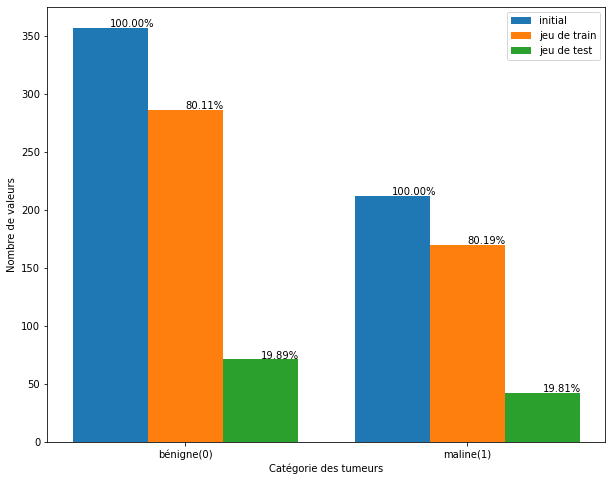

In [48]:


plt.figure(figsize=(10,8))

total_0 = cancer.target.value_counts()[0]
total_1 = cancer.target.value_counts()[1]

n, bins, patches = plt.hist([y, y_train, y_test], label=['initial', 'jeu de train', 'jeu de test'], bins=np.arange(3) - 0.5)
plt.legend(loc='upper right')
plt.xticks([0, 1], ["bénigne(0)", "maline(1)"])
plt.ylabel("Nombre de valeurs")
plt.xlabel("Catégorie des tumeurs")
bin_centers = np.diff(bins)*0.5 + bins[:-1]

for patch in patches:
    width_0, height_0 = patch[0].get_width(), patch[0].get_height()
    x_text_0, y_text_0 = patch[0].get_xy()
    width_1, height_1 = patch[1].get_width(), patch[1].get_height()
    x_text_1, y_text_1 = patch[1].get_xy()
    plt.annotate("{:.2%}".format(height_0/total_0), xy = (x_text_0 + width_0/2 , y_text_0 + height_0 + 1))
    plt.annotate("{:.2%}".format(height_1/total_1), xy = (x_text_1 + width_1/2 , y_text_1 + height_1 + 1))

plt.show()

In [49]:
total_0 = cancer.target.value_counts()[0]
total_1 = cancer.target.value_counts()[1]

[-3.49261051 -2.8032212  -2.11383189 -1.42444258 -0.73505328 -0.04566397
  0.64372534  1.33311465  2.02250396  2.71189326  3.40128257]
[-3.49261051 -2.8032212  -2.11383189 -1.42444258 -0.73505328 -0.04566397
  0.64372534  1.33311465  2.02250396  2.71189326]


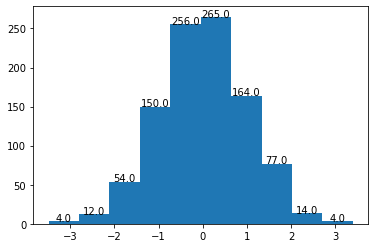

In [50]:
n, bins, _ = plt.hist(np.random.normal(size=1000))
xs = (bins[:-1] + bins[1:])/2 # 各柱の端が返るので1つずらして足して2で割ることで真ん中にする
ys = n
for x, y in zip(xs, ys):
    plt.text(x, y, str(y), horizontalalignment="center")
plt.savefig("result.png")

print(bins )
print(bins[:-1] )

<AxesSubplot:title={'center':'number vs Diagnosis'}, xlabel='diagnosis_mod', ylabel='count'>

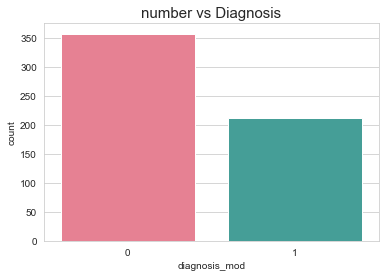

In [51]:
# a count plot shows the counts of observations in each categorical bin using bars
# think of it as a histogram across a categorical, instead of quantitative, variable
sns.set_style("whitegrid")
plt.title("number vs Diagnosis",fontsize=15)
sns.countplot(data = df_cp, x = 'diagnosis_mod', palette = 'husl')

## 7 - Effectuer le Feature Scaling 

In [52]:
# Transform the individual features so that the mean is zero and the variance is one.
# 個々の特徴量を平均が0で分散が1になるように変換します。

In [53]:
# Extraction of the target variable 目的変数の抽出
#y = df_cp["diagnosis"]

# Extraction of explanatory variables 説明変数の抽出
#X = df.loc[:, "mean radius":"worst fractal dimension"]

In [54]:
# Standarlisation 標準化
scaler = StandardScaler()

# fit_transform 統計情報を計算して正規化を実行する
X_train_scaled = scaler.fit_transform(X_train)

# テストデータの変換には訓練データで計算された最小・最大値を使用
X_test_scaled = scaler.transform(X_test)

## 8 - Calculer et afficher les performances obtenues sur le jeu d'apprentissage
### トレーニングセットでのパフォーマンスを計算して表示

### Matrice de confusion 混同行列

In [55]:
model = LogisticRegression(C = 0.1, max_iter = 10000) # C=0.1 best for the standarlisation, but not for normalisation
model.fit(X_train_scaled, y_train)

print('Train score: {:.3f}'.format(model.score(X_train_scaled, y_train)))

mc_train = confusion_matrix(y_true=y_train, y_pred=model.predict(X_train_scaled))
print('Confusion matrix of train data:\n{}'.format(mc_train))

Train score: 0.980
Confusion matrix of train data:
[[284   2]
 [  7 163]]


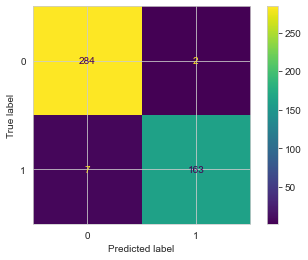

In [56]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_train_scaled, y_train)
plt.show()

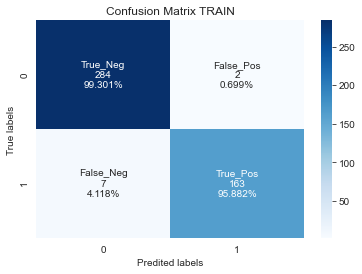

In [57]:
# Matrice de confusion pour le train
c_m_TRAIN = confusion_matrix(y_true=y_train, y_pred=model.predict(X_train_scaled))
c_m_TRAIN

#pour RAJOUTER les labels et les pourcentages sur le graphique, passer par seaborn
#fig = plt.figure(figsize=(15, 7), dpi=100)
ax= plt.subplot()

group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in c_m_TRAIN.flatten()]
group_percentages1 = ["{0:.3%}".format(value) for value in c_m_TRAIN.flatten()[0:2]/np.sum(c_m_TRAIN.flatten()[0:2])]
group_percentages2 = ["{0:.3%}".format(value) for value in c_m_TRAIN.flatten()[2:]/np.sum(c_m_TRAIN.flatten()[2:])]
group_percentages = np.append(group_percentages1, group_percentages2).tolist()
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.array(labels).reshape(2,2)

sns.heatmap(c_m_TRAIN, annot=labels, fmt='', cmap='Blues')

ax.set_xlabel('Predited labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix TRAIN') 

plt.show()

In [58]:
cm = confusion_matrix(y_true=y_train, y_pred=model.predict(X_train_scaled))
tn_train, fp_train, fn_train, tp_train = cm.flatten()
print('tn_train ='+str(tn_train))
print('fp_train ='+str(fp_train))
print('fn_train ='+str(fn_train))
print('tp_train ='+str(tp_train))

tn_train =284
fp_train =2
fn_train =7
tp_train =163


### Taux de classification (分類率 accuracy), Rappel (再現率 Recall), Précision (適合率、精度) et F1-Score (F値)

In [59]:
y_true_train = y_train
y_pred_train =model.predict(X_train_scaled)

In [60]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_true_train, y_pred_train)
print('Taux de classifiation (accuracy) for train: {:.3f}'.format(ac))

Taux de classifiation (accuracy) for train: 0.980


In [61]:
from sklearn.metrics import recall_score
rc = recall_score(y_true_train, y_pred_train)
print('Recall score for train: {:.3f}'.format(rc))

Recall score for train: 0.959


In [62]:
from sklearn.metrics import precision_score
pc = precision_score(y_true_train, y_pred_train)
print('Precision score for train: {:.3f}'.format(pc))

Precision score for train: 0.988


In [63]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true_train, y_pred_train)
print('F1 score for train: {:.3f}'.format(f1))

F1 score for train: 0.973


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_true_train, y_pred_train)) # Build a text report showing the main classification metrics

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       286
           1       0.99      0.96      0.97       170

    accuracy                           0.98       456
   macro avg       0.98      0.98      0.98       456
weighted avg       0.98      0.98      0.98       456



### Courbe ROC, AUC for train

In [65]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [66]:
#y_pred = model.predict_proba(X_test)[:,1]

In [67]:
y_true_train = y_train
y_pred_proba_train =model.predict_proba(X_train_scaled)[:,1]

In [68]:
from sklearn.metrics import auc

In [69]:
fpr, tpr, thresholds = roc_curve(y_true_train, y_pred_proba_train)
roc_auc = auc(fpr, tpr)
print('AUC_train : {:.3f}'.format(roc_auc))

AUC_train : 0.996


In [70]:
from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_true_train, y_pred_proba_train)
print('AUC : {:.3f}'.format(roc_auc_score))

AUC : 0.996


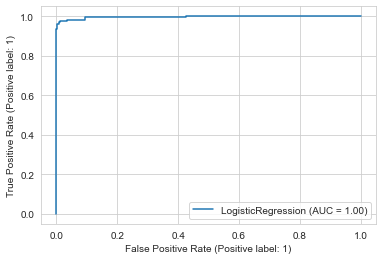

In [71]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_train_scaled, y_true_train) 
plt.show()

<class 'tuple'>
3
[0.         0.         0.         0.0034965  0.0034965  0.00699301
 0.00699301 0.01048951 0.01048951 0.03496503 0.03496503 0.09440559
 0.09440559 0.42657343 0.42657343 1.        ]
[0.         0.00588235 0.93529412 0.93529412 0.95882353 0.95882353
 0.97058824 0.97058824 0.97647059 0.97647059 0.98235294 0.98235294
 0.99411765 0.99411765 1.         1.        ]
[2.00000000e+00 1.00000000e+00 5.69187007e-01 5.62071600e-01
 5.02515453e-01 5.00640087e-01 4.47593837e-01 4.09510569e-01
 4.06535178e-01 3.11630753e-01 2.97161340e-01 1.63364299e-01
 1.62019989e-01 2.39442159e-02 2.35667981e-02 7.21899287e-05]


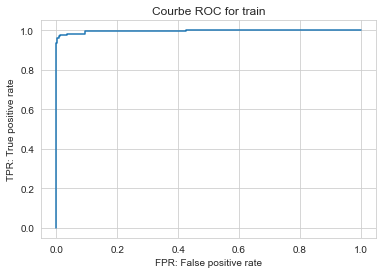

In [72]:
from sklearn.metrics import roc_curve

roc = roc_curve(y_true_train, y_pred_proba_train)
print(type(roc))
print(len(roc)) # 3つの要素は順番にfpr, tpr, thresholdsで、それぞれFPR（偽陽性率）、TPR（真陽性率）、閾値

fpr, tpr, thresholds = roc_curve(y_true_train, y_pred_proba_train)
print(fpr)
print(tpr)
print(thresholds)

#fig = plt.figure(figsize=(10, 7), dpi=100)
plt.title('Courbe ROC for train')
plt.plot(fpr, tpr)
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.show()

## 9 - Calculer et afficher les performances obtenues sur le jeu d'test  
### テストセットでのパフォーマンスを計算して表示

### Matrice de confusion 混同行列

In [73]:
model = LogisticRegression(C = 0.1, max_iter = 10000)
model.fit(X_train_scaled, y_train)

# 学習モデルの検証
print('Test score: {:.3f}'.format(model.score(X_test_scaled, y_test)))
print('Confusion matrix of test data:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=model.predict(X_test_scaled))))



Test score: 0.982
Confusion matrix of test data:
[[71  0]
 [ 2 40]]


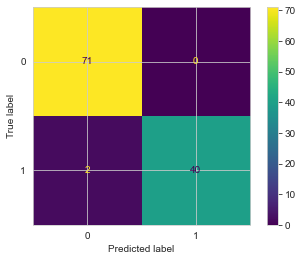

In [74]:
plot_confusion_matrix(model, X_test_scaled, y_test)
plt.show()

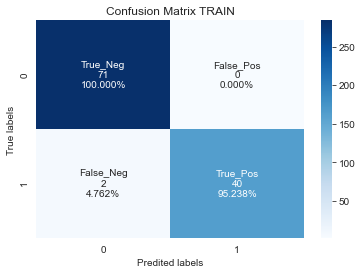

In [75]:
# Matrice de confusion pour le train
c_m_TEST = confusion_matrix(y_true=y_test, y_pred=model.predict(X_test_scaled))
c_m_TEST

#pour RAJOUTER les labels et les pourcentages sur le graphique, passer par seaborn
#fig = plt.figure(figsize=(15, 7), dpi=100)
ax= plt.subplot()

group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in c_m_TEST.flatten()]
group_percentages1 = ["{0:.3%}".format(value) for value in c_m_TEST.flatten()[0:2]/np.sum(c_m_TEST.flatten()[0:2])]
group_percentages2 = ["{0:.3%}".format(value) for value in c_m_TEST.flatten()[2:]/np.sum(c_m_TEST.flatten()[2:])]
group_percentages = np.append(group_percentages1, group_percentages2).tolist()
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.array(labels).reshape(2,2)

sns.heatmap(c_m_TRAIN, annot=labels, fmt='', cmap='Blues')

ax.set_xlabel('Predited labels')
ax.set_ylabel('True labels') 

ax.set_title('Confusion Matrix TRAIN') 

plt.show()

In [76]:
cm = confusion_matrix(y_true=y_test, y_pred=model.predict(X_test_scaled))
tn_test, fp_test, fn_test, tp_test = cm.flatten()
print('tn_test ='+str(tn_test))
print('fp_test ='+str(fp_test))
print('fn_test ='+str(fn_test))
print('tp_test ='+str(tp_test))

tn_test =71
fp_test =0
fn_test =2
tp_test =40


### Taux de classification (分類率 accuracy), Rappel (再現率 Recall), Précision (適合率、精度) et F1-Score (F値)

In [77]:
y_true_test = y_test
y_pred_test =model.predict(X_test_scaled)

In [78]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_true_test, y_pred_test)
print('Taux de classifiation (accuracy) for test: {:.3f}'.format(ac))

Taux de classifiation (accuracy) for test: 0.982


In [79]:
from sklearn.metrics import recall_score
rc = recall_score(y_true_test, y_pred_test)
print('Recall score for test: {:.3f}'.format(rc))

Recall score for test: 0.952


In [80]:
from sklearn.metrics import precision_score
pc = precision_score(y_true_test, y_pred_test)
print('Precision score for test: {:.3f}'.format(pc))

Precision score for test: 1.000


In [81]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true_test, y_pred_test)
print('F1 score for test: {:.3f}'.format(f1))

F1 score for test: 0.976


### Courbe ROC, AUC for test

In [82]:
y_true_test = y_test
y_pred_proba_test =model.predict_proba(X_test_scaled)[:,1]

In [83]:
fpr, tpr, thresholds = roc_curve(y_true_test, y_pred_proba_test)
roc_auc = auc(fpr, tpr)
print('AUC_test : {:.3f}'.format(roc_auc))

AUC_test : 0.998


In [84]:
from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_true_test, y_pred_proba_test)
print('AUC_test : {:.3f}'.format(roc_auc_score))

AUC_test : 0.998


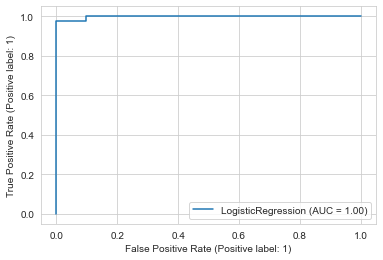

In [85]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test_scaled, y_test) 
plt.show()

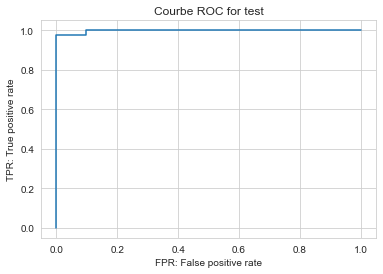

In [86]:
from sklearn.metrics import roc_curve

"""roc = roc_curve(y_true_train, y_pred_train)
print(type(roc))
print(len(roc)) # 3つの要素は順番にfpr, tpr, thresholdsで、それぞれFPR（偽陽性率）、TPR（真陽性率）、閾値

fpr, tpr, thresholds = roc_curve(y_true_train, y_pred_train)
print(fpr)
print(tpr)
print(thresholds)"""

roc_test = roc_curve(y_true_test, y_pred_proba_test)
#fig = plt.figure(figsize=(10, 7), dpi=100)
plt.plot(fpr, tpr)
plt.title('Courbe ROC for test')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.show()